In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [12]:
points = {"blue": [[2, 4], [1, 3], [2, 3], [3, 2], [2, 1]],
          "red": [[5, 6], [4, 1], [4, 6], [6, 6], [5, 4]]}

In [14]:
new_point = [3, 4]

In [15]:
# getting euclidean distance between two points
def euclidean_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [16]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.point = None
    
    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distance = []
        
        for category, points in self.points.items():
            for point in points:
                dist = euclidean_distance(point, new_point)
                distance.append([dist, category]) 

        categories = [category[1] for category in sorted(distance)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

In [17]:
clf = KNN(k=3)
clf.fit(points)
print(clf.predict(new_point))

blue


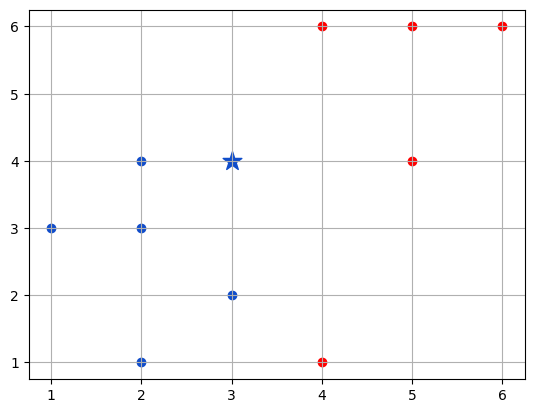

In [23]:
ax = plt.subplot()
ax.grid(True)

for point in points['blue']:
    ax.scatter(point[0], point[1], color="#104dca")
for point in points['red']:
    ax.scatter(point[0], point[1], color="#FF0000")

new_class = clf.predict(new_point)
color = "#FF0000" if new_class == "red" else "#104dca"

ax.scatter(new_point[0], new_point[1], color = color, marker = "*", s=200)
plt.show()

#### Another way for x, y form

In [ ]:
%%writefile knn.py
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """Store the training data."""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Predict the class labels for the input data."""
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        """Predict the class label for a single instance."""
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

Writing knn_new.py
